# Machine Learning Assignment 2
Group Members:
    Weizhuo Zhang()
    Mingjie Shi(470193259)

# 1.Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # use matlab to demonstrate
import time
from IPython.display import Markdown, display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split #split the data
from sklearn.metrics import roc_curve, auc  
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import cross_val_score

%  matplotlib inline

# 2. import Data

In [3]:
# reading data using panda
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship',
                'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                'native-country', 'income']

Train = pd.read_csv('adult.data.txt', sep = ",\s", header = None, names = column_names, engine = 'python')
Test = pd.read_csv('adult.test.txt', sep= ",\s", header = None, names = column_names, engine = 'python')

display(Train.head(n=5))

Test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'') # Remove . in the income of Test
display(Test.head(n=5))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 3. Operate the Data
## 3.1 Check the missing value


In [4]:
Train_Data = Train.shape[0]
print(Train_Data)
for i, j in zip(Train.columns, (Train.values.astype(str) == '?').sum(axis = 0)):
    if j !=0: 
        percentage = float(j/Train_Data * 100)
        print(str(i) + ': ' + "{0:.4f}%".format(percentage))
        
Test_Data = Test.shape[0]
print(Test_Data)
for i, j in zip(Test.columns, (Test.values.astype(str) == '?').sum(axis = 0)):
    if j !=0: 
        percentage = float(j/Test_Data * 100)
        print(str(i) + ': ' + "{0:.4f}%".format(percentage))

32561
workclass: 5.6386%
occupation: 5.6601%
native-country: 1.7905%
16281
workclass: 5.9149%
occupation: 5.9333%
native-country: 1.6829%


In [5]:
Train = Train.replace({'?': None})
Train = Train.dropna(axis=0)
print('Train shape after removing the missing value:' + str(Train.shape))
display(Train.corr())

Test = Test.replace({'?': None})
Test = Test.dropna(axis=0)
print('Test shape after removing the missing value:' + str(Test.shape))
display(Test.corr())

Train shape after removing the missing value:(30162, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


Test shape after removing the missing value:(15060, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.074375,0.026123,0.078760,0.057745,0.102758
fnlwgt,-0.074375,1.000000,-0.036010,-0.012839,0.006421,-0.010306
education-num,0.026123,-0.036010,1.000000,0.131750,0.085817,0.133691
capital-gain,0.078760,-0.012839,0.131750,1.000000,-0.031876,0.090501
capital-loss,0.057745,0.006421,0.085817,-0.031876,1.000000,0.057712
hours-per-week,0.102758,-0.010306,0.133691,0.090501,0.057712,1.000000


## 3.2 Check the occupancy rate

In [6]:
Adult = pd.concat([Train, Test]) #Combine the two table together
Adult.reset_index(inplace = True, drop = True) # using the column as the index, drop the index before.
for num in set(Adult.columns) - set(Adult.describe().columns):
    Adult[num] = Adult[num].astype('category')

print(Adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null category
fnlwgt            45222 non-null int64
education         45222 non-null category
education-num     45222 non-null int64
marital-status    45222 non-null category
occupation        45222 non-null category
relationship      45222 non-null category
race              45222 non-null category
sex               45222 non-null category
capital-gain      45222 non-null int64
capital-loss      45222 non-null int64
hours-per-week    45222 non-null int64
native-country    45222 non-null category
income            45222 non-null category
dtypes: category(9), int64(6)
memory usage: 2.5 MB
None


In [7]:
a = Adult.groupby(by = ['native-country'])
a.size()
Adult['native-country'] = Adult['native-country'].map(lambda x:1 if x == 'United-States' else 0)

## 3.3 Data Situation & Feature

In [8]:
# TODO: Total number of records
n_records = Adult.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = sum(Adult['income'] == '>50K')

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = sum(Adult['income'] == '<=50K')

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = np.true_divide(n_greater_50k , n_records) * 100

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))
Adult.describe()

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.913095
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.281698
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [9]:
#Pivot table Education and Education_num then sort Education_num from smallest to largest.
education_Pivot = pd.pivot_table(Adult, index = 'education', values = 'education-num')
education_Pivot.sort_values(by=['education-num'])

,education-num
education,
Preschool,1
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
10th,6
11th,7
12th,8
HS-grad,9


In [10]:
#education could represent education-num. Thus, drop the education-num.
Adult.drop('education-num', axis=1, inplace=True)
print('Data shape after removing education-num: '+str(Adult.shape))

Data shape after removing education-num: (45222, 14)


## 3.4 Check Identify Data Feature

Text(0,0.5,'Proportion of population')

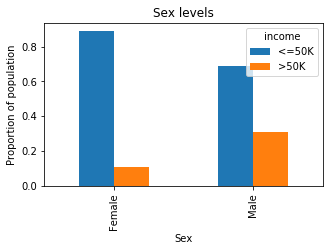

In [11]:
#gender
sex = round(pd.crosstab(Adult.sex, Adult.income).div(pd.crosstab(Adult.sex, Adult.income).apply(sum,1),0),2)
sex.sort_values(by = '>50K', inplace = True)

ax = sex.plot(kind ='bar', title = 'Sex levels', figsize = (5,3))
ax.set_xlabel('Sex')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

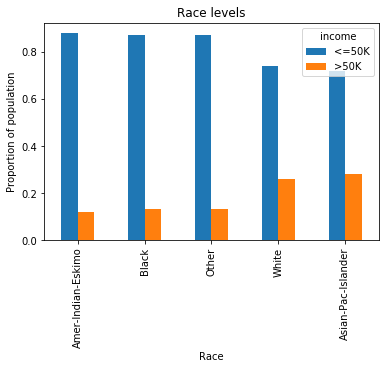

In [12]:
#Race
race = round(pd.crosstab(Adult.race, Adult.income).div(pd.crosstab(Adult.race, Adult.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)

ax = race.plot(kind ='bar', title = 'Race levels', figsize = (6,4))
ax.set_xlabel('Race')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

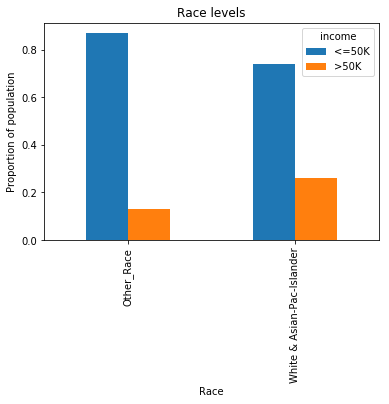

In [13]:
#Classify Race
Adult.replace(['Amer-Indian-Eskimo','Black','Other', 
                  'White','Asian-Pac-Islander'],
                 ['Other_Race','Other_Race','Other_Race',
                  'White & Asian-Pac-Islander','White & Asian-Pac-Islander'],
                 inplace = True)
#Race
race = round(pd.crosstab(Adult.race, Adult.income).div(pd.crosstab(Adult.race, Adult.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)

ax = race.plot(kind ='bar', title = 'Race levels', figsize = (6,4))
ax.set_xlabel('Race')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

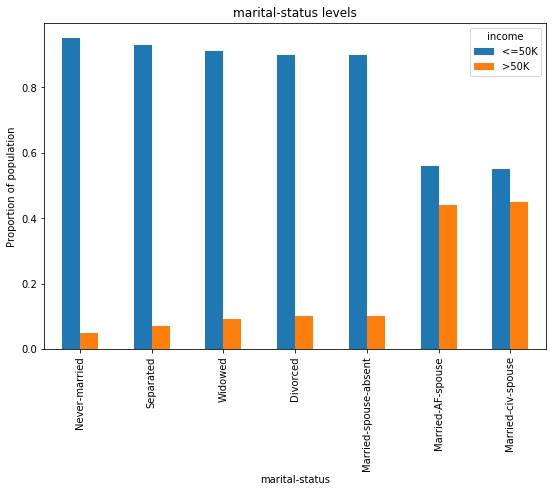

In [14]:
#marital-status
marital_status = round(pd.crosstab(Adult['marital-status'], Adult.income).div(pd.crosstab(Adult['marital-status'], Adult.income).apply(sum,1),0),2)
marital_status.sort_values(by = '>50K', inplace = True)

ax = marital_status.plot(kind ='bar', title = 'marital-status levels', figsize = (9,6))
ax.set_xlabel('marital-status')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

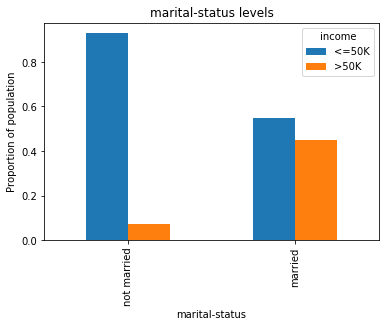

In [15]:
#From the martial-status, we could know that there's the difference between married and not married.

Adult.replace(['Never-married','Divorced','Separated' , 'Widowed', 
                  'Married-spouse-absent','Married-AF-spouse','Married-civ-spouse'],
                 ['not married','not married','not married','not married',
                  'married','married','married'],
                 inplace = True)

#marital-status
marital_status = round(pd.crosstab(Adult['marital-status'], Adult.income).div(pd.crosstab(Adult['marital-status'], Adult.income).apply(sum,1),0),2)
marital_status.sort_values(by = '>50K', inplace = True)

ax = marital_status.plot(kind ='bar', title = 'marital-status levels', figsize = (6,4))
ax.set_xlabel('marital-status')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

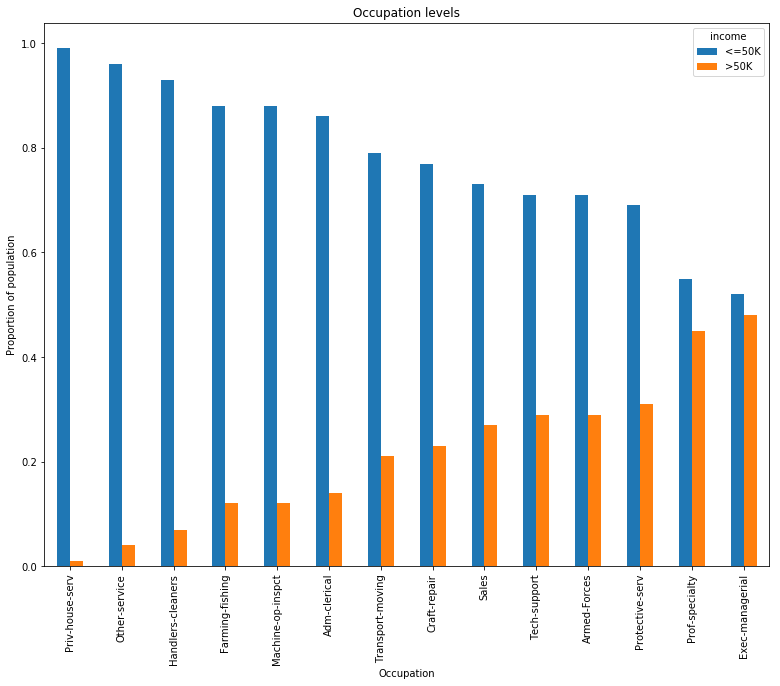

In [16]:
#occupation
occupation = round(pd.crosstab(Adult.occupation, Adult.income).div(pd.crosstab(Adult.occupation, Adult.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)

ax = occupation.plot(kind ='bar', title = 'Occupation levels', figsize = (13,10))
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

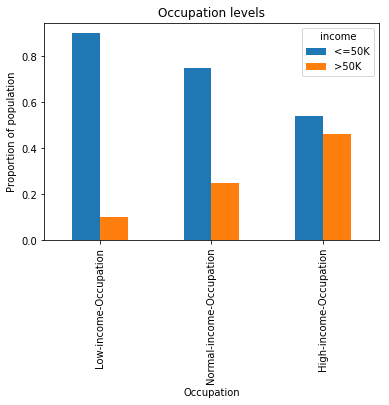

In [17]:
#Classify the Occupation
Adult.replace(['Priv-house-serv', 'Other-service', 'Handlers-cleaners', 'Farming-fishing', 'Machine-op-inspct','Adm-clerical',
              'Transport-moving', 'Craft-repair', 'Sales', 'Tech-support', 'Armed-Forces','Protective-serv',
              'Prof-specialty', 'Exec-managerial'],
                 ['Low-income-Occupation','Low-income-Occupation','Low-income-Occupation','Low-income-Occupation','Low-income-Occupation','Low-income-Occupation',
                  'Normal-income-Occupation','Normal-income-Occupation','Normal-income-Occupation','Normal-income-Occupation','Normal-income-Occupation','Normal-income-Occupation',
                  'High-income-Occupation','High-income-Occupation'],
                 inplace = True)

#occupation
occupation = round(pd.crosstab(Adult.occupation, Adult.income).div(pd.crosstab(Adult.occupation, Adult.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)

ax = occupation.plot(kind ='bar', title = 'Occupation levels', figsize = (6,4))
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

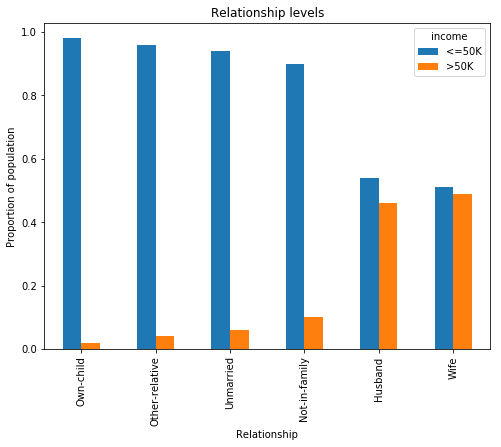

In [18]:
#relationship
relationship = round(pd.crosstab(Adult.relationship, Adult.income).div(pd.crosstab(Adult.relationship, Adult.income).apply(sum,1),0),2)
relationship.sort_values(by = '>50K', inplace = True)

ax = relationship.plot(kind ='bar', title = 'Relationship levels', figsize = (8,6))
ax.set_xlabel('Relationship')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

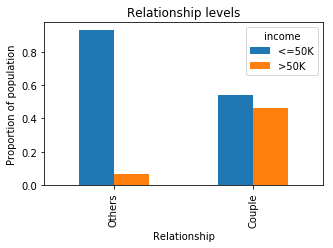

In [19]:
#Classify the Relationship
Adult.replace(['Own-child','Other-relative','Unmarried','Not-in-family', 
                  'Husband','Wife'],
                 ['Others','Others','Others','Others',
                  'Couple','Couple'],
                 inplace = True)
#relationship
relationship = round(pd.crosstab(Adult.relationship, Adult.income).div(pd.crosstab(Adult.relationship, Adult.income).apply(sum,1),0),2)
relationship.sort_values(by = '>50K', inplace = True)

ax = relationship.plot(kind ='bar', title = 'Relationship levels', figsize = (5,3))
ax.set_xlabel('Relationship')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

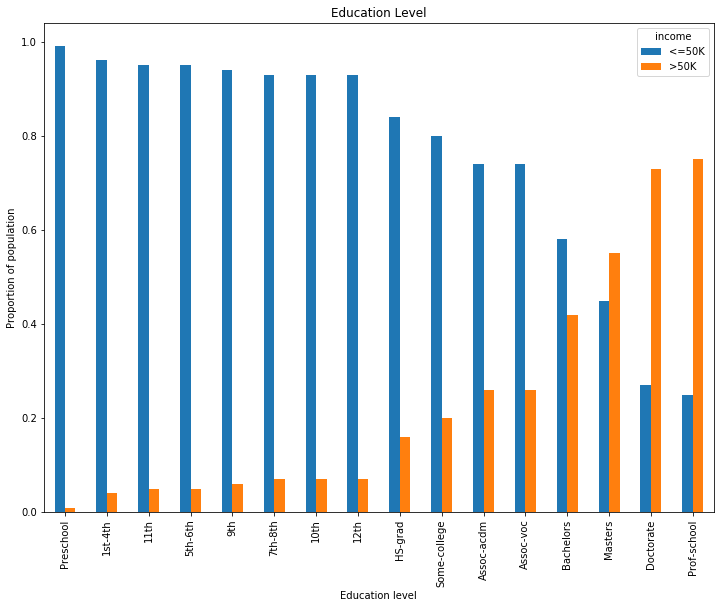

In [20]:
#education
education = round(pd.crosstab(Adult.education, Adult.income).div(pd.crosstab(Adult.education, Adult.income).apply(sum,1),0),2)
education.sort_values(by = '>50K', inplace = True)

ax = education.plot(kind ='bar', title = 'Education Level', figsize = (12,9))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

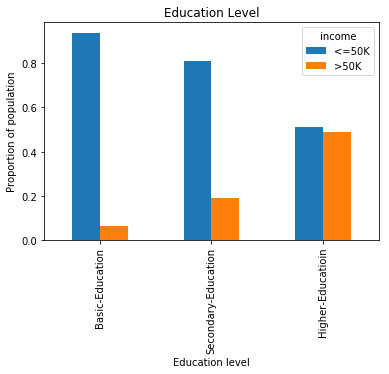

In [21]:
#Classify the education
Adult.replace(['Preschool','1st-4th','11th','5th-6th', '9th','7th-8th','10th','12th',
               'HS-grad','Some-college','Assoc-acdm','Assoc-voc',
               'Bachelors','Masters','Doctorate','Prof-school' ],
                 ['Basic-Education','Basic-Education','Basic-Education','Basic-Education','Basic-Education','Basic-Education','Basic-Education','Basic-Education',
                  'Secondary-Education','Secondary-Education','Secondary-Education','Secondary-Education',
                  'Higher-Educatioin','Higher-Educatioin','Higher-Educatioin','Higher-Educatioin'],
                 inplace = True)
#education
education = round(pd.crosstab(Adult.education, Adult.income).div(pd.crosstab(Adult.education, Adult.income).apply(sum,1),0),2)
education.sort_values(by = '>50K', inplace = True)

ax = education.plot(kind ='bar', title = 'Education Level', figsize = (6,4))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

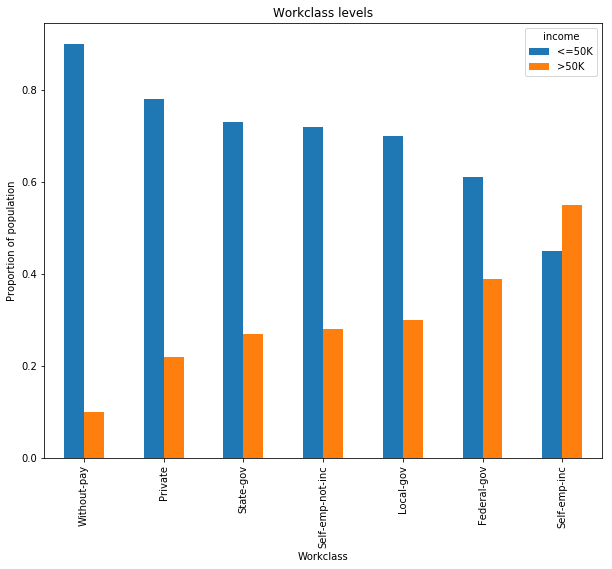

In [22]:
#workclass
workclass = round(pd.crosstab(Adult.workclass, Adult.income).div(pd.crosstab(Adult.workclass, Adult.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)

ax = workclass.plot(kind ='bar', title = 'Workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass')
ax.set_ylabel('Proportion of population')

Text(0,0.5,'Proportion of population')

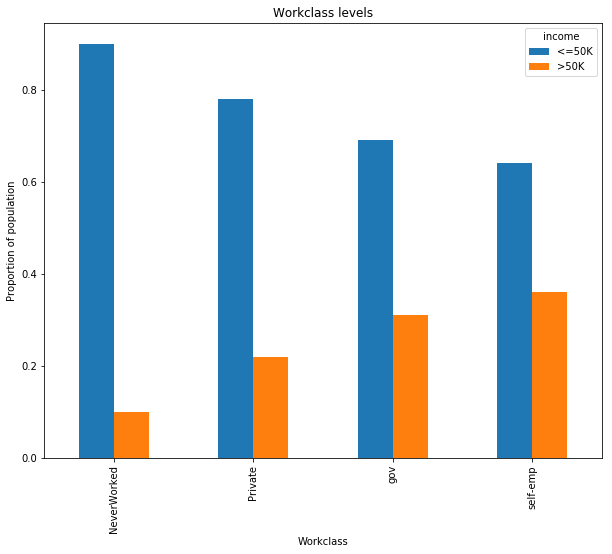

In [23]:
Adult.replace(['Without-pay', 'Private', 'State-gov', 'Local-gov', 'Federal-gov',
               'Self-emp-not-inc','Self-emp-inc' ],
                 ['NeverWorked','Private','gov','gov','gov','self-emp','self-emp'],
                 inplace = True)
workclass = round(pd.crosstab(Adult.workclass, Adult.income).div(pd.crosstab(Adult.workclass, Adult.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)

ax = workclass.plot(kind ='bar', title = 'Workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass')
ax.set_ylabel('Proportion of population')

# 4.Normalize the Data

## 4.1 Handle the Data

In [24]:
# Select numerical data and standardised them
numbers = ['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week']
Adult[numbers] = Adult[numbers].apply(lambda x: (x-np.mean(x))/np.std(x))

# For categorical data only contains two categories, use label-encode rather than dummy
# to reduce the feature number and make it easier for later processing
categories =['marital-status', 'sex', 'relationship','race','native-country','income'] 
for i in categories:
    dummy_mapping = {label:idx for idx, label in enumerate(np.unique(Adult[i]))}
    Adult[i] = Adult[i].map(dummy_mapping)
    
# Get cols that need to be converted to dummies
cols_dummy = ['workclass','education','occupation']

cols_keep = ['age', 'fnlwgt','marital-status', 'sex','relationship','race',
             'capital-gain','capital-loss','hours-per-week','income','native-country']

# Change to dummies
dummy_features = pd.get_dummies(Adult[cols_dummy])

#print(dummy_features)
# Concat dummy variables with columns kept
Adult = pd.concat([Adult[cols_keep],dummy_features],axis=1)

In [25]:
print('Data set shape after preprocessing: ' + str(Adult.shape))
Adult.head(n=10)

Data set shape after preprocessing: (45222, 21)


,age,fnlwgt,marital-status,sex,relationship,race,capital-gain,capital-loss,hours-per-week,income,...,workclass_NeverWorked,workclass_Private,workclass_gov,workclass_self-emp,education_Basic-Education,education_Higher-Educatioin,education_Secondary-Education,occupation_High-income-Occupation,occupation_Low-income-Occupation,occupation_Normal-income-Occupation
0,0.034201,-1.062295,1,1,1,1,0.142888,-0.21878,-0.078120,0,...,0,0,1,0,0,1,0,0,1,0
1,0.866417,-1.007438,0,1,0,1,-0.146733,-0.21878,-2.326738,0,...,0,0,0,1,0,1,0,1,0,0
2,-0.041455,0.245284,1,1,1,1,-0.146733,-0.21878,-0.078120,0,...,0,1,0,0,0,0,1,0,1,0
3,1.093385,0.425853,0,1,0,0,-0.146733,-0.21878,-0.078120,0,...,0,1,0,0,1,0,0,0,1,0
4,-0.798015,1.407393,0,0,0,0,-0.146733,-0.21878,-0.078120,0,...,0,1,0,0,0,1,0,1,0,0
5,-0.117111,0.897852,0,0,0,1,-0.146733,-0.21878,-0.078120,0,...,0,1,0,0,0,1,0,1,0,0
6,0.790761,-0.279707,0,0,1,0,-0.146733,-0.21878,-2.076892,0,...,0,1,0,0,1,0,0,0,1,0
7,1.017729,0.188448,0,1,0,1,-0.146733,-0.21878,0.338291,1,...,0,0,0,1,0,0,1,1,0,0
8,-0.571047,-1.362708,1,0,1,1,1.729546,-0.21878,0.754701,1,...,0,1,0,0,0,1,0,1,0,0
9,0.261169,-0.286693,0,1,0,1,0.543083,-0.21878,-0.078120,1,...,0,1,0,0,0,1,0,1,0,0


In [26]:
# Data Prep
Adult_data = Adult.drop(columns = ['income'])
Adult_label = Adult.income

arr_adult = np.array(Adult_data)
# Since we combine train and test before for easy pre-processing
# Now we want to seperate them 

# Get the number of train data
n = Train.shape[0]

# Use stratified sampling
Train_data, Exam_data, Train_label, Exam_label = train_test_split(arr_adult[:n,:], 
                                                      Adult_label[:n], 
                                                      test_size=0.20, 
                                                      stratify=Adult_label[:n], 
                                                      random_state=1)   
# Used for tunned and fully-trained model 
# Do not use for train and validate 
print('Train_data shape: '+str(Train_data.shape))
print('Exam_data shape: '+str(Exam_data.shape))
print('Train_label shape: '+str(Train_label.shape))
print('Exam_label shape: '+str(Exam_label.shape))

Test_data = arr_adult[n:,:]
Test_label = Adult_label[n:]

print('Test_data shape: '+str(Test_data.shape))
print('Test_label shape: '+str(Test_label.shape))


Train_data shape: (24129, 20)
Exam_data shape: (6033, 20)
Train_label shape: (24129,)
Exam_label shape: (6033,)
Test_data shape: (15060, 20)
Test_label shape: (15060,)


## 4.2 Define the Evaluation model 

In [27]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc[1,1]
    TN = confusion.loc[0,0]
    FP = confusion.loc[0,1]
    FN = confusion.loc[1,0]
    print(confusion)

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out


# 5. Model Development

## 5.1 Logistic Regression

In [28]:
t0=time.time()
log_reg = LogisticRegression()
log_fs = log_reg.fit(Train_data, Train_label)
t1=time.time()
t2 = time.time()
log_reg_pred = log_fs.predict(Exam_data)

logistic_reg = model_eval(Exam_label, log_reg_pred)
print('Logistic Regression : %.2f percent.' % (round(logistic_reg['accuracy']*100,3)))

#printmd('### 3.5.2. Model Evaulation ')
ovl_logreg = round(pd.DataFrame([logistic_reg], index = ['logistic_reg']),4)
display(ovl_logreg)

lr_scores = cross_val_score(log_fs, Train_data, Train_label, cv=10)
lr_scores1 = cross_val_score(log_fs, Train_data, Train_label, cv=10, scoring = 'roc_auc')

t3 = time.time()
#Precision, recall, fscore, support value
print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), 
                                              np.std(lr_scores)))
print('10-fold CV ROC AUC: %.3f +/- %.3f' % (np.mean(lr_scores1), 
                                              np.std(lr_scores1)))
print('Classifier Runtime: '+ str(t1-t0)+'s')
print('Evaluation Runtime: '+ str(t3-t2)+'s')

Predicted     0    1
Actual              
0          4237  294
1           647  855
Logistic Regression : 84.40 percent.


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
logistic_reg,0.844,0.156,0.645,0.7441,0.5692,0.5692,0.9351


10-fold CV accuracy: 0.843 +/- 0.003
10-fold CV ROC AUC: 0.896 +/- 0.004
Classifier Runtime: 0.11537933349609375s
Evaluation Runtime: 1.7361547946929932s


## 5.2 Decision Tree

In [ ]:
# Cart(Gini)
print('Cart (Gini)')
t0=time.time()
clf_gini = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.05, min_samples_leaf = 0.001, max_features = None)
clf_gini = clf_gini.fit(Train_data, Train_label)
t1=time.time()
t2 =time.time()
clf_gini_pred = clf_gini.predict(Exam_data)
DTree_Gini = model_eval(Exam_label, clf_gini_pred)
print('Desicion Tree using Gini Index : %.2f percent.' % (round(DTree_Gini['accuracy']*100,2)))

lr_scores = cross_val_score(clf_gini, Train_data, Train_label, cv=10)
lr_scores1 = cross_val_score(clf_gini, Train_data, Train_label, cv=10, scoring = 'roc_auc')

t3 = time.time()
#Precision, recall, fscore, support value
print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), 
                                              np.std(lr_scores)))
print('10-fold CV ROC AUC: %.3f +/- %.3f' % (np.mean(lr_scores1), 
                                              np.std(lr_scores1)))
print('Classifier Runtime: '+ str(t1-t0)+'s')
print('Evaluation Runtime: '+ str(t3-t2)+'s')



# Entropy
print('\n')
print('ID3 (Entropy)')
t0=time.time()
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 0.05, min_samples_leaf = 0.001)
clf_entropy = clf_entropy.fit(Train_data, Train_label)
t1=time.time()
t2=time.time()
clf_entropy_pred = clf_entropy.predict(Exam_data)
DTree_Entropy = model_eval(Exam_label, clf_entropy_pred)
print('Desicion Tree using Entropy : %.2f percent.' % (round(DTree_Entropy['accuracy']*100,2)))

lr_scores = cross_val_score(clf_entropy, Train_data, Train_label, cv=10)
lr_scores1 = cross_val_score(clf_entropy, Train_data, Train_label, cv=10, scoring = 'roc_auc')

t3 = time.time()
#Precision, recall, fscore, support value
print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), 
                                              np.std(lr_scores)))
print('10-fold CV ROC AUC: %.3f +/- %.3f' % (np.mean(lr_scores1), 
                                              np.std(lr_scores1)))
print('Classifier Runtime: '+ str(t1-t0)+'s')
print('Evaluation Runtime: '+ str(t3-t2)+'s')

print('\n')
print('Comparison')
ovl_dtree = round(pd.DataFrame([DTree_Entropy, DTree_Gini], index = ['DTree_Entropy','DTree_Gini']),4)
display(ovl_dtree)

## 5.3 SVM

In [64]:
# Linear kernel
t0=time.time()
svm_clf_linear = svm.SVC(kernel = 'linear')
svm_clf_linear.fit(Train_data, Train_label)
svm_clf_linear_pred = svm_clf_linear.predict(Exam_data)
SVM_linear = model_eval(Exam_label, svm_clf_linear_pred)
print('SVM using linear kernel : %.2f percent.' % (round(SVM_linear['accuracy']*100,2)))
t1 = time.time() #End time
print('runtime: '+ str((t1-t0))+'s')

lr_scores = cross_val_score(svm_clf_linear, Train_data, Train_label, cv=10)
lr_scores1 = cross_val_score(svm_clf_linear, Train_data, Train_label, cv=10, scoring = 'roc_auc')

t2 = time.time()
#Precision, recall, fscore, support value
print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), 
                                              np.std(lr_scores)))
print('10-fold CV ROC AUC: %.3f +/- %.3f' % (np.mean(lr_scores1), 
                                              np.std(lr_scores1)))

print('Evaluation Runtime: '+ str(t2-t1)+'s')

Predicted     0    1
Actual              
0          4251  280
1           681  821
SVM using linear kernel : 84.07 percent.
runtime: 12.150474071502686s
10-fold CV accuracy: 0.837 +/- 0.006
10-fold CV ROC AUC: 0.887 +/- 0.005
Evaluation Runtime: 198.87296175956726s


In [65]:

# Poly kernal
t0 = time.time() #End time

svm_clf_poly = svm.SVC(kernel = 'poly')
svm_clf_poly.fit(Train_data, Train_label)
svm_clf_poly_pred = svm_clf_poly.predict(Exam_data)
SVM_poly = model_eval(Exam_label, svm_clf_poly_pred)
print('SVM using poly kernel : %.2f percent.' % (round(SVM_poly['accuracy']*100,2)))
t1 = time.time() #End time
print('runtime: '+ str((t1-t0))+'s')

lr_scores = cross_val_score(svm_clf_poly, Train_data, Train_label, cv=10)
lr_scores1 = cross_val_score(svm_clf_poly, Train_data, Train_label, cv=10, scoring = 'roc_auc')

t2 = time.time()
#Precision, recall, fscore, support value
print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), 
                                              np.std(lr_scores)))
print('10-fold CV ROC AUC: %.3f +/- %.3f' % (np.mean(lr_scores1), 
                                              np.std(lr_scores1)))

print('Evaluation Runtime: '+ str(t2-t1)+'s')

Predicted     0    1
Actual              
0          4324  207
1           744  758
SVM using poly kernel : 84.24 percent.
runtime: 8.947975873947144s
10-fold CV accuracy: 0.842 +/- 0.003
10-fold CV ROC AUC: 0.891 +/- 0.005
Evaluation Runtime: 132.25516605377197s


In [66]:
# rbf
t0=time.time()
svm_clf_rbf = svm.SVC(kernel = 'rbf', C = 1, tol = 1e-3)
svm_clf_rbf.fit(Train_data, Train_label)
svm_clf_rbf_pred = svm_clf_rbf.predict(Exam_data)
SVM_rbf = model_eval(Exam_label, svm_clf_rbf_pred)
print('SVM using rbf kernel : %.2f percent.' % (round(SVM_rbf['accuracy']*100,2)))
t1 = time.time() #End time
print('runtime: '+ str((t1-t0))+'s')

lr_scores = cross_val_score(svm_clf_rbf, Train_data, Train_label, cv=10)
lr_scores1 = cross_val_score(svm_clf_rbf, Train_data, Train_label, cv=10, scoring = 'roc_auc')

t3 = time.time()
#Precision, recall, fscore, support value
print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), 
                                              np.std(lr_scores)))
print('10-fold CV ROC AUC: %.3f +/- %.3f' % (np.mean(lr_scores1), 
                                              np.std(lr_scores1)))

print('Evaluation Runtime: '+ str(t3-t1)+'s')


Predicted     0    1
Actual              
0          4296  235
1           700  802
SVM using rbf kernel : 84.50 percent.
runtime: 14.98170804977417s
10-fold CV accuracy: 0.845 +/- 0.004
10-fold CV ROC AUC: 0.893 +/- 0.005
Evaluation Runtime: 176.23368787765503s


In [80]:
from sklearn.metrics import classification_report
t0=time.time()
svm_clf_rbf = svm.SVC(kernel = 'rbf', C = 1, tol = 1e-3)
svm_clf_rbf.fit(Train_data, Train_label)
svm_clf_rbf_pred = svm_clf_rbf.predict(Exam_data)
SVM_rbf = model_eval(Exam_label, svm_clf_rbf_pred)
print('SVM using rbf kernel : %.2f percent.' % (round(SVM_rbf['accuracy']*100,2)))
t1 = time.time() #End time
print('runtime: '+ str((t1-t0))+'s')

lr_scores = cross_val_score(svm_clf_rbf, Train_data, Train_label, cv=10)
lr_scores1 = cross_val_score(svm_clf_rbf, Train_data, Train_label, cv=10, scoring = 'roc_auc')

t3 = time.time()
#Precision, recall, fscore, support value
print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), 
                                              np.std(lr_scores)))
print('10-fold CV ROC AUC: %.3f +/- %.3f' % (np.mean(lr_scores1), 
                                              np.std(lr_scores1)))

print('Evaluation Runtime: '+ str(t3-t1)+'s')
print(classification_report(Exam_label, svm_clf_rbf_pred))

Predicted     0    1
Actual              
0          4296  235
1           700  802
SVM using rbf kernel : 84.50 percent.
runtime: 11.46447205543518s
10-fold CV accuracy: 0.845 +/- 0.004
10-fold CV ROC AUC: 0.893 +/- 0.005
Evaluation Runtime: 243.90102100372314s
             precision    recall  f1-score   support

          0       0.86      0.95      0.90      4531
          1       0.77      0.53      0.63      1502

avg / total       0.84      0.85      0.83      6033



In [67]:
#sigmoid
t0 = time.time()
svm_clf_sigmoid = svm.SVC(kernel = 'sigmoid')
svm_clf_sigmoid.fit(Train_data, Train_label)
svm_clf_sigmoid_pred = svm_clf_sigmoid.predict(Exam_data)
SVM_sigmoid = model_eval(Exam_label, svm_clf_sigmoid_pred)
print('SVM using sigmoid kernel : %.2f percent.' % (round(SVM_sigmoid['accuracy']*100,2)))
t1 = time.time() #End time
print('runtime: '+ str((t1-t0))+'s')

lr_scores = cross_val_score(svm_clf_sigmoid, Train_data, Train_label, cv=10)
lr_scores1 = cross_val_score(svm_clf_sigmoid, Train_data, Train_label, cv=10, scoring = 'roc_auc')

t2 = time.time()
#Precision, recall, fscore, support value
print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), 
                                              np.std(lr_scores)))
print('10-fold CV ROC AUC: %.3f +/- %.3f' % (np.mean(lr_scores1), 
                                              np.std(lr_scores1)))

print('Evaluation Runtime: '+ str(t2-t1)+'s')


Predicted     0    1
Actual              
0          3844  687
1           717  785
SVM using sigmoid kernel : 76.73 percent.
runtime: 15.668283939361572s
10-fold CV accuracy: 0.770 +/- 0.009
10-fold CV ROC AUC: 0.791 +/- 0.011
Evaluation Runtime: 220.83599424362183s


In [68]:
#printmd('### 3.3.2. Model Evaulation ')
ovl_svm = round(pd.DataFrame([SVM_linear, SVM_poly, SVM_rbf, SVM_sigmoid], index = ['SVM_linear', 'SVM_poly', 'SVM_rbf', 'SVM_sigmoid']),4)
display(ovl_svm)

,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
SVM_linear,0.8407,0.1593,0.6308,0.7457,0.5466,0.5466,0.9382
SVM_poly,0.8424,0.1576,0.6145,0.7855,0.5047,0.5047,0.9543
SVM_rbf,0.8450,0.1550,0.6317,0.7734,0.5340,0.5340,0.9481
SVM_sigmoid,0.7673,0.2327,0.5279,0.5333,0.5226,0.5226,0.8484


In [69]:
t0 = time.time() # Start time
svm_clf_rbf = svm.SVC(kernel = 'rbf', C = 1, tol = 1e-3)
svm_clf_rbf.fit(Train_data, Train_label)
svm_clf_rbf_pred = svm_clf_rbf.predict(Test_data)
SVM_rbf = model_eval(Test_label, svm_clf_rbf_pred)
pred_svm_test = svm_clf_rbf.predict(Test_data)
print('SVM using rbf kernel : %.2f percent.' % (round(SVM_rbf['accuracy']*100,2)))
t1 = time.time() #End time
print('runtime: '+ str((t1-t0))+'s')

ovl_svm = round(pd.DataFrame([SVM_rbf], index = [ 'SVM_rbf']),4)
display(ovl_svm)

Predicted      0     1
Actual                
0          10712   648
1           1723  1977
SVM using rbf kernel : 84.26 percent.
runtime: 25.219882011413574s


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
SVM_rbf,0.8426,0.1574,0.6251,0.7531,0.5343,0.5343,0.943
